In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load the dataset
file_path = "/content/titanic.csv"  # Adjust path if running locally
df = pd.read_csv(file_path)

In [5]:

# Display basic info
print("Dataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Handling missing values
df.fillna({"Age": df["Age"].median(), "Embarked": df["Embarked"].mode()[0]}, inplace=True)
df.drop(columns=["Cabin"], inplace=True)  # Dropping Cabin as it has too many NaN

In [7]:
# Convert categorical variables to appropriate types
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [8]:
# Basic Insights
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:

# Survival rate by gender
survival_by_gender = df.groupby("Sex")["Survived"].mean()
print("\nSurvival Rate by Gender:\n", survival_by_gender)


Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-9-2a9454e4ba1b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_gender = df.groupby("Sex")["Survived"].mean()


In [10]:
# Survival rate by class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
print("\nSurvival Rate by Class:\n", survival_by_class)


Survival Rate by Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [15]:
# Visualization
plt.figure(figsize=(12, 6))
plt.show()

<Figure size 1200x600 with 0 Axes>

<ipython-input-12-7eba815b4506>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="Set1")


Text(0.5, 1.0, 'Survival Count')

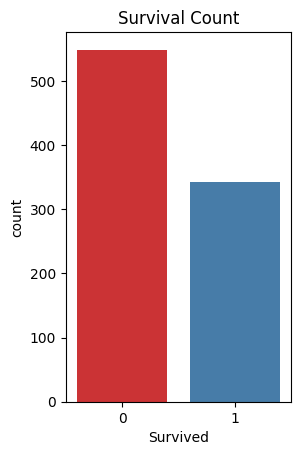

In [12]:
# Countplot of survivors
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Survived", palette="Set1")
plt.title("Survival Count")

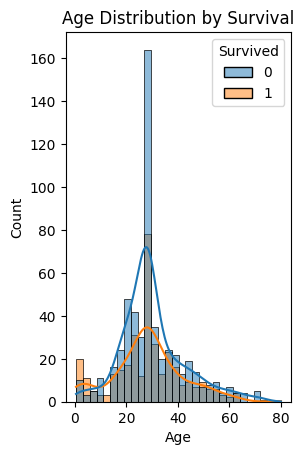

In [16]:
# Age distribution by survival
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

In [14]:
plt.show()